In [22]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
import pandas as pd
from matplotlib import pyplot as plt



In [114]:
data = pd.read_json('./datasets/reviews_Video_Games_5.json', lines=True)


This dataset storage structure is simple and records 231780 user reviews. The 'reviewerID' is the user ID, and the 'asin' is the item ID. The 'overall' is the user's score for the product.

In [115]:
print(data.shape)
data.head(3)


(231780, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"


The data records a total of 24303 user evaluation behaviors, which included 10672 products. The evaluation score ranges from 1 to 5. 
The average user rating of the dataset is 4.08.

In [116]:
print("users:",len(data['reviewerID'].unique()))
print("items:",len(data['asin'].unique()))
print("mean:",data['overall'].mean())

users: 24303
items: 10672
mean: 4.086396582966606


The bar chart shows that most users have given higher scores. It can be seen from here that users are satisfied with most products.


/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0.5, 1.0, 'Rating scores')

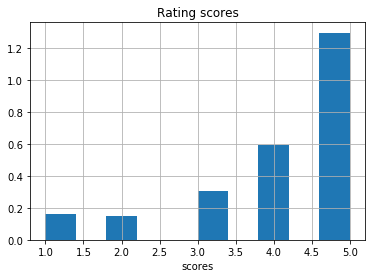

In [135]:
data['overall'].hist(bins = 10,histtype = 'bar',normed =True)
plt.xlabel('scores') 
plt.title("Rating scores")

In order to further explore the situation of user praise, we selected the top 5 items with the most favorable comments from users. Among them, "B00BGA9WK2" received 2,855 users 5 points praise. Through the web crawling, we could know that the product is "PlayStation 4 500GB Console".

,overall,unixReviewTime
asin,,
B00BGA9WK2,2855,793119600000
B0015AARJI,2515,672382598400
B007CM0K86,2035,561753273600
B002VBWIP6,1995,544925404800
B000B9RI14,1865,502394745600


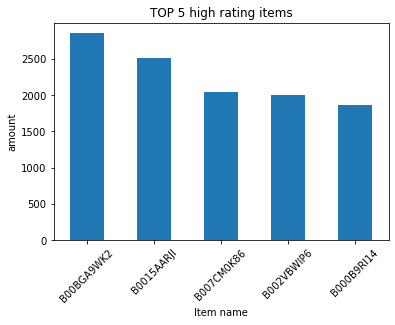

In [137]:
top_5_items = data[data['overall']==5].groupby('asin').sum().sort_values(by="overall",ascending=False).head()
# top_5_items.plot()
top_5_items['overall'].plot.bar()
plt.ylabel("amount")
plt.xlabel("Item name" )
plt.xticks(rotation=45)
plt.title("TOP 5 high rating items")
(top_5_items)


We also try to analyze the 5 products with the highest scores of 1 that users rated as blow. "B000FKBCX4" got 1 point for the score by  151 users. Through the web crawling, we could know that the product is a game named "Spore - PC/Mac."

,overall,unixReviewTime
asin,,
B000FKBCX4,151,184973328000
B00178630A,141,189243388800
B007FTE2VW,125,170573126400
B007VTVRFA,104,141888672000
B00BGA9WK2,64,88793971200


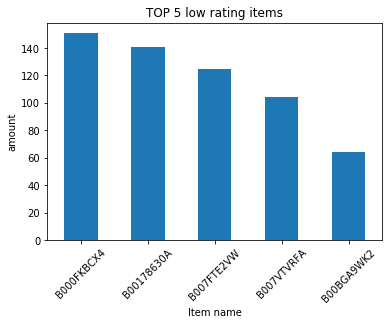

In [138]:
top_5_items = data[data['overall']==1].groupby('asin').sum().sort_values(by="overall",ascending=False).head()
# top_5_items.plot()
top_5_items['overall'].plot.bar()
plt.ylabel("amount")
plt.xlabel("Item name" )
plt.xticks(rotation=45)
plt.title("TOP 5 low rating items")
(top_5_items)


Before that, we analyzed the product score. Furthermore,  we want to explore the behavior for evaluation. Some users rate and evaluate multiple products, and we make such users active users. Active users have tried different products to get different reviews, so their reviews are precious. Of course, it also contains a lot of personal preference information. The five users with the most evaluations are as follows.

In [122]:
data['reviewerID'].value_counts().head()

A3V6Z4RCDGRC44    773
AJKWF4W7QD4NS     635
A3W4D8XOGLWUN5    456
A2QHS1ZCIQOL7E    450
A29BQ6B90Y1R5F    404
Name: reviewerID, dtype: int64

Here we only select the most active users as an example. This active user rated it 773 times in this dataset. Moreover, there is no repeated evaluation of a product.

In [144]:
active_user= data[data['reviewerID']=="A3V6Z4RCDGRC44"]
print(active_user['asin'].duplicated().all())
active_user.head(3)

False


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
1400,A3V6Z4RCDGRC44,B00000INR2,"Lisa Shea ""be the change you wish to see in t...","[111, 112]",The expansion pack beefs up the graphics capab...,5,A must-have for any serious Nintendo player,972950400,"10 31, 2000"
2051,A3V6Z4RCDGRC44,B00000JRSB,"Lisa Shea ""be the change you wish to see in t...","[18, 26]",Final Fantasy VII was the first release for th...,5,Still great after all these years,1050710400,"04 19, 2003"
2244,A3V6Z4RCDGRC44,B00000K125,"Lisa Shea ""be the change you wish to see in t...","[1, 1]",Soul Calibur is the classic version of the arc...,5,Still fun after all these years,1103414400,"12 19, 2004"


The figure below shows the distribution of the scores of this active user. It can be seen that the user compares 773 products horizontally, and most products give 4-5 points. The information of these active users is very valuable for our future analysis.

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/hist.py:309: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


Text(0.5, 1.0, 'Most active user rating scores')

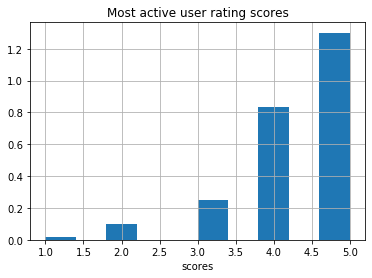

In [145]:
active_user['overall'].hist(bins = 10,histtype = 'bar',normed =True)
plt.xlabel('scores') 
plt.title("Most active user rating scores")